In [1]:
import pandas as pd

try:
    df = pd.read_csv('IRIS.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'IRIS.csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Data Shape: (150, 5)

Data Types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Descriptive Statistics for Numerical Features:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Class Distribution:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

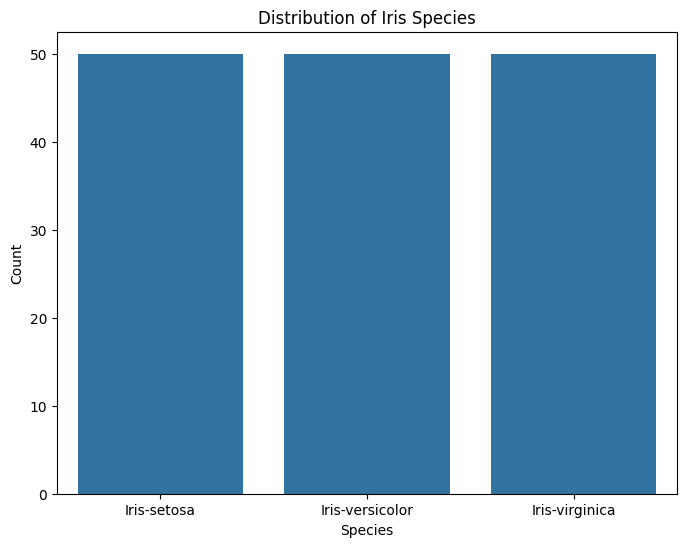

In [2]:

print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
print("\nDescriptive Statistics for Numerical Features:\n", df[numerical_features].describe())
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['species'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

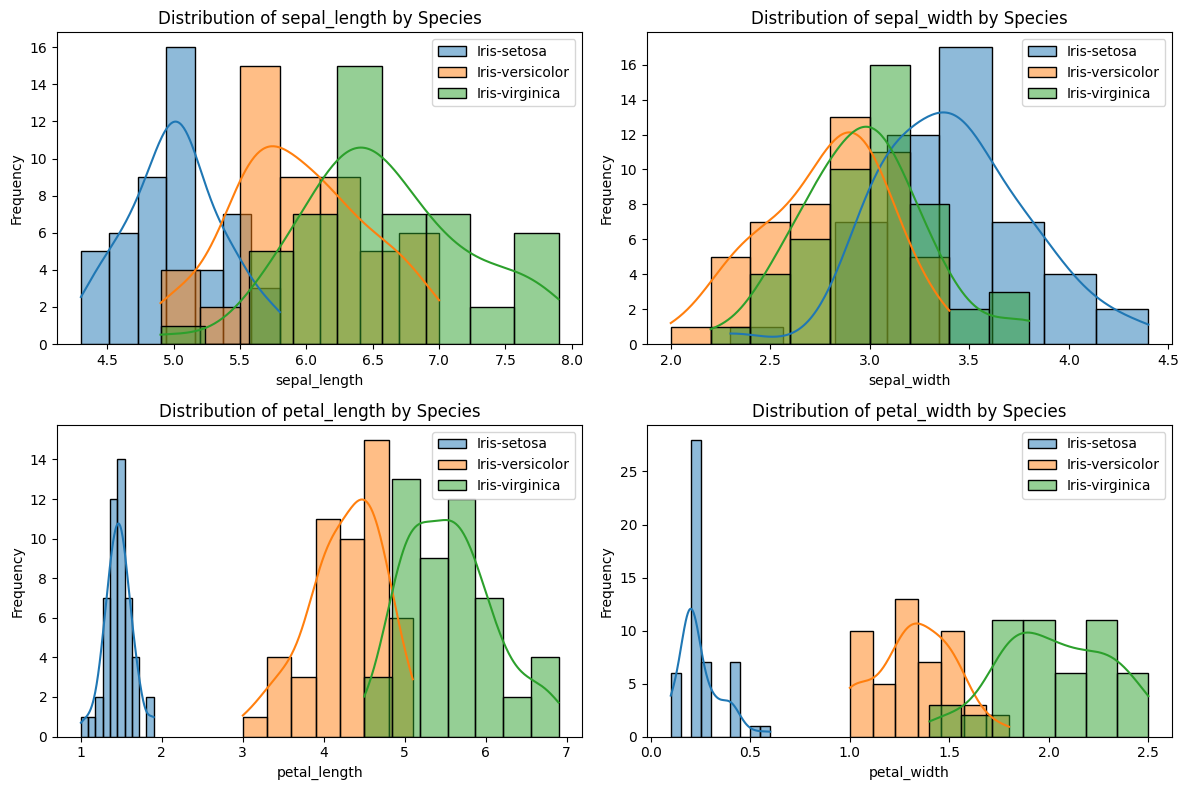

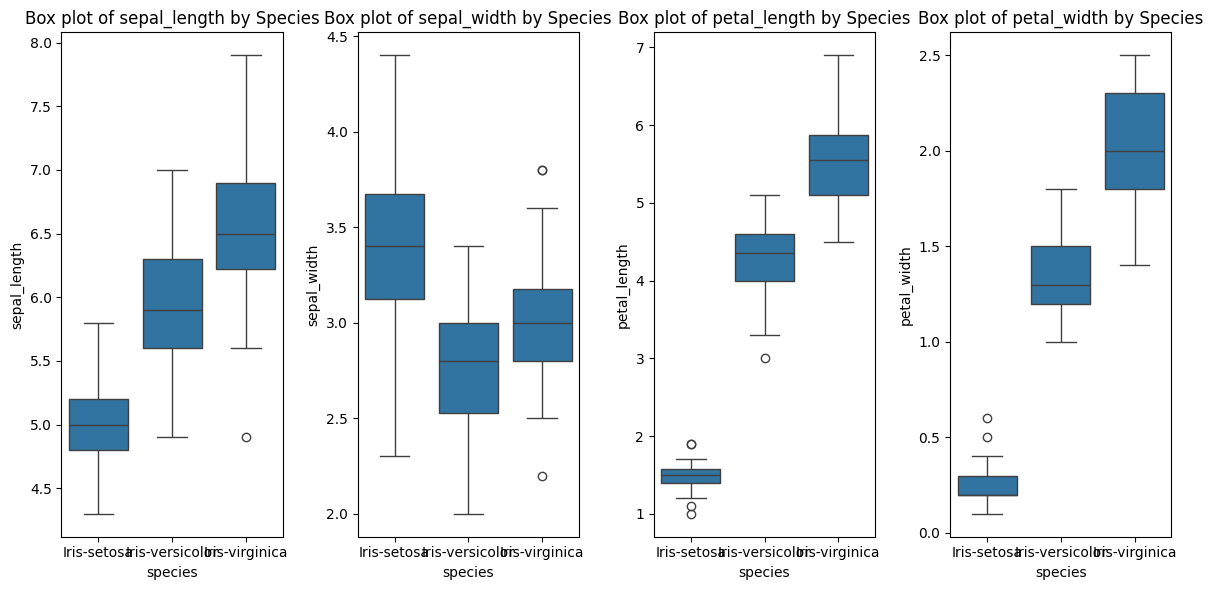

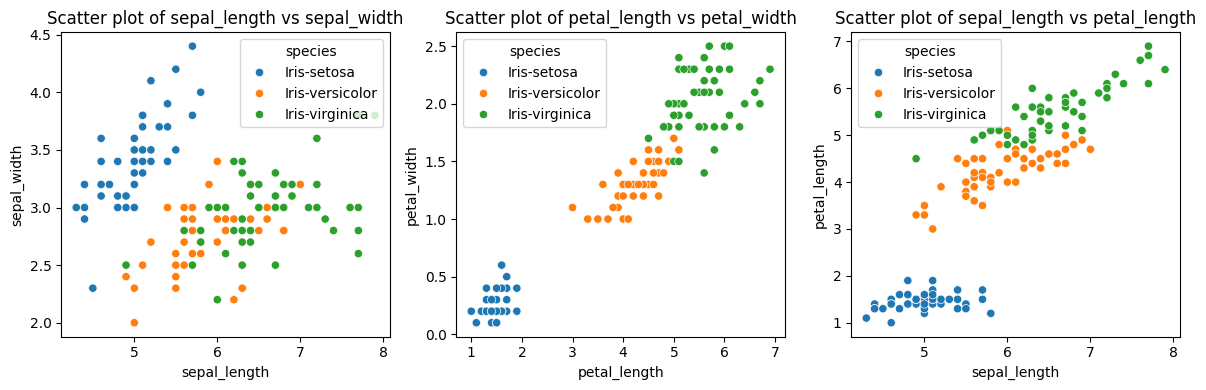

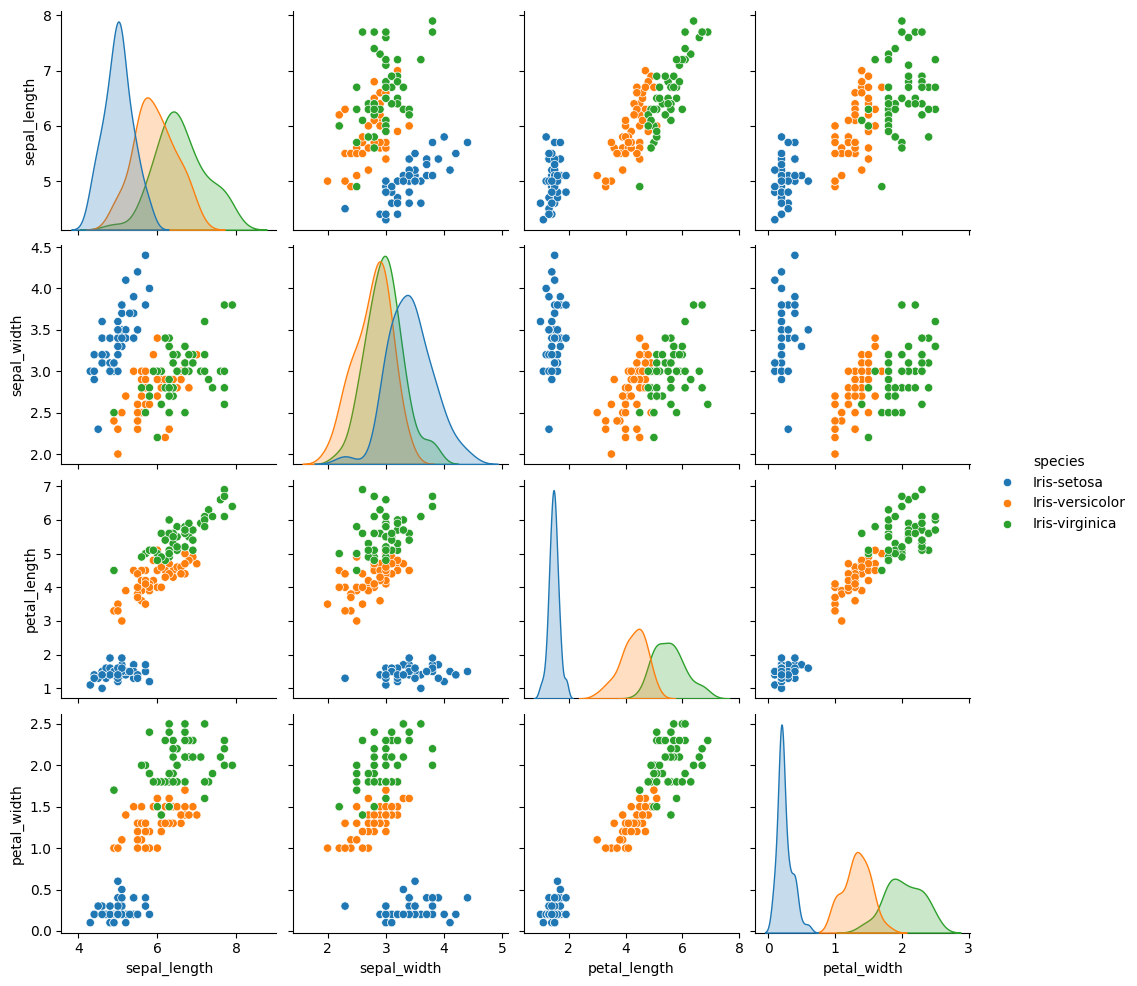

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i + 1)
    for species in df['species'].unique():
        sns.histplot(df[df['species'] == species][feature], label=species, kde=True)
    plt.title(f'Distribution of {feature} by Species')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Box plot of {feature} by Species')
plt.tight_layout()
plt.show()

# Scatter plots
plt.figure(figsize=(12, 4))
for i, (feature1, feature2) in enumerate([('sepal_length', 'sepal_width'), ('petal_length', 'petal_width'), ('sepal_length', 'petal_length')]):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=feature1, y=feature2, hue='species', data=df)
    plt.title(f'Scatter plot of {feature1} vs {feature2}')
plt.tight_layout()
plt.show()

# Pairplot (optional)
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

SVC()

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
y_pred = svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1-score: 0.9665831244778613
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search = GridSearchCV(SVC(), param_grid, scoring='f1_weighted', cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_svm_classifier = SVC(**grid_search.best_params_)
best_svm_classifier.fit(X_train_scaled, y_train)
y_pred = best_svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1-score: 0.9665831244778613
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
